# Project on advertising data by Codsoft
---
Thanks for this internship @codsoft

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
data = pd.read_csv(r"D:\Data science\Python_DA\advertising.csv")
data.T

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
TV,230.1,44.5,17.2,151.5,180.8,8.7,57.5,120.2,8.6,199.8,...,39.5,75.5,17.2,166.8,149.7,38.2,94.2,177.0,283.6,232.1
Radio,37.8,39.3,45.9,41.3,10.8,48.9,32.8,19.6,2.1,2.6,...,41.1,10.8,4.1,42.0,35.6,3.7,4.9,9.3,42.0,8.6
Newspaper,69.2,45.1,69.3,58.5,58.4,75.0,23.5,11.6,1.0,21.2,...,5.8,6.0,31.6,3.6,6.0,13.8,8.1,6.4,66.2,8.7
Sales,22.1,10.4,12.0,16.5,17.9,7.2,11.8,13.2,4.8,15.6,...,10.8,11.9,5.9,19.6,17.3,7.6,14.0,14.8,25.5,18.4


In [111]:
# df = data.copy()

In [112]:
# looking into data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [113]:
# looking into statistical information of data
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [114]:
#Returns the number of missing values in dataset
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

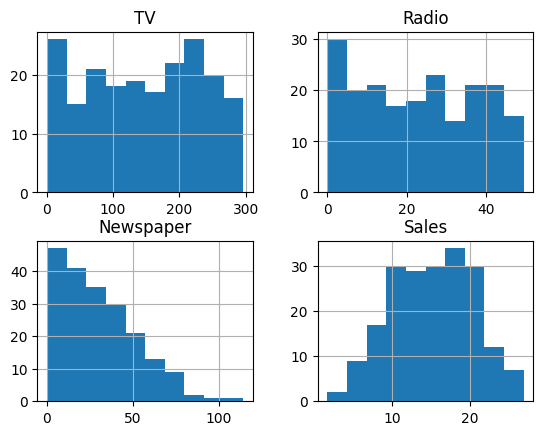

In [115]:
df.hist()

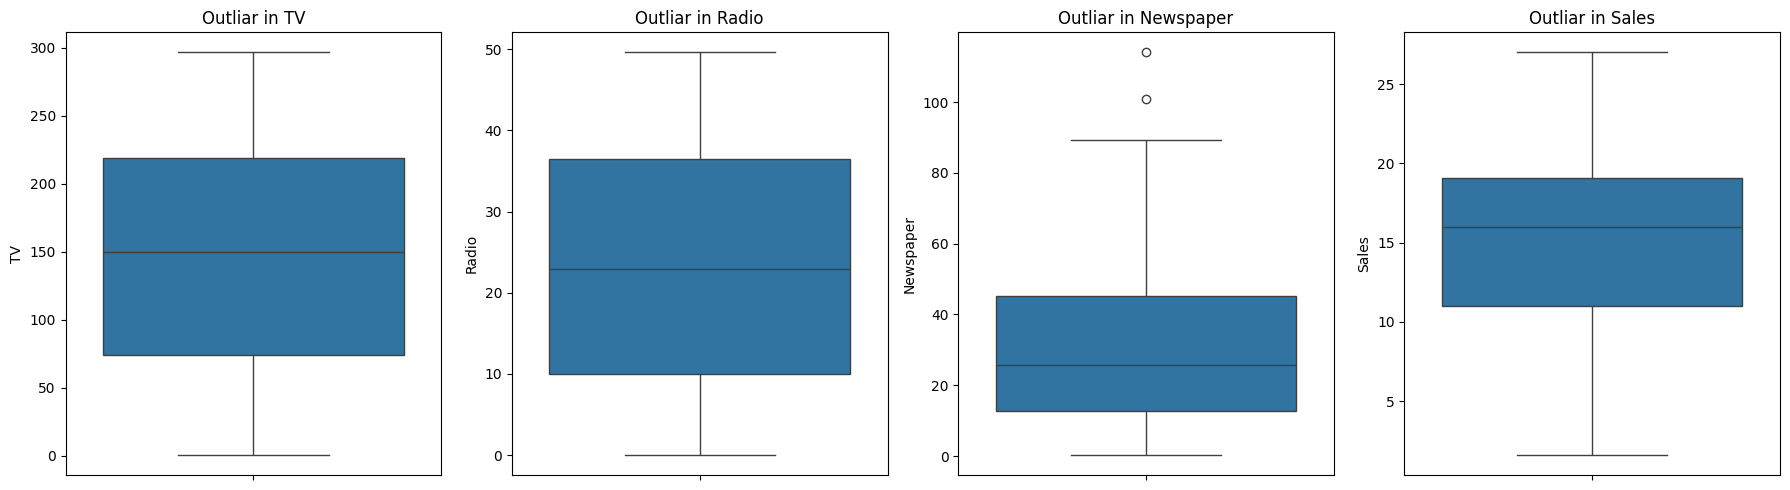

In [222]:
plt.figure(figsize=(18, 5))

# Outliar of TV
plt.subplot(1,4, 1)
sns.boxplot(df['TV'])
plt.title('Outliar in TV')

# Outliar of Radio
plt.subplot(1,4, 2)
sns.boxplot(df['Radio'])
plt.title('Outliar in Radio')

# Outliar of Newspaper
plt.subplot(1,4, 3)
sns.boxplot(df['Newspaper'])
plt.title('Outliar in Newspaper')

# Outliar in Sales:
plt.subplot(1,4,4)
sns.boxplot(df['Sales'])
plt.title('Outliar in Sales')

plt.tight_layout()
plt.show()

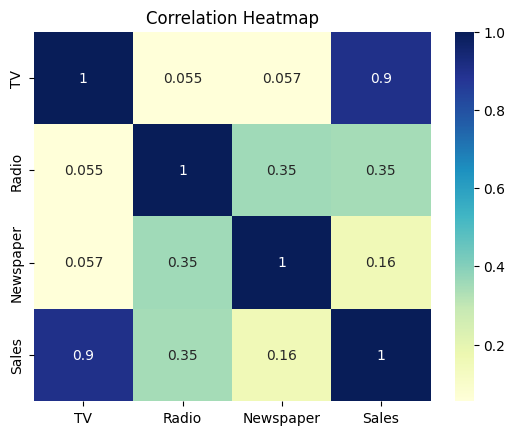

In [225]:
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',)
plt.title('Correlation Heatmap')
plt.show()

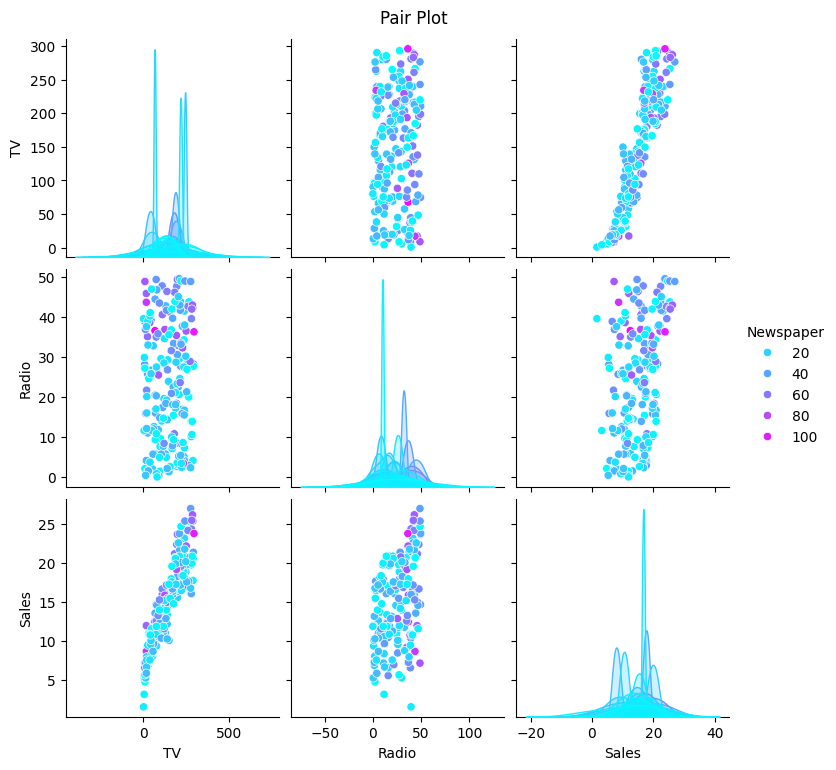

In [117]:
# Pair plot
sns.pairplot(df, hue='Newspaper', palette="cool")
plt.suptitle('Pair Plot', y=1.02)
plt.show()

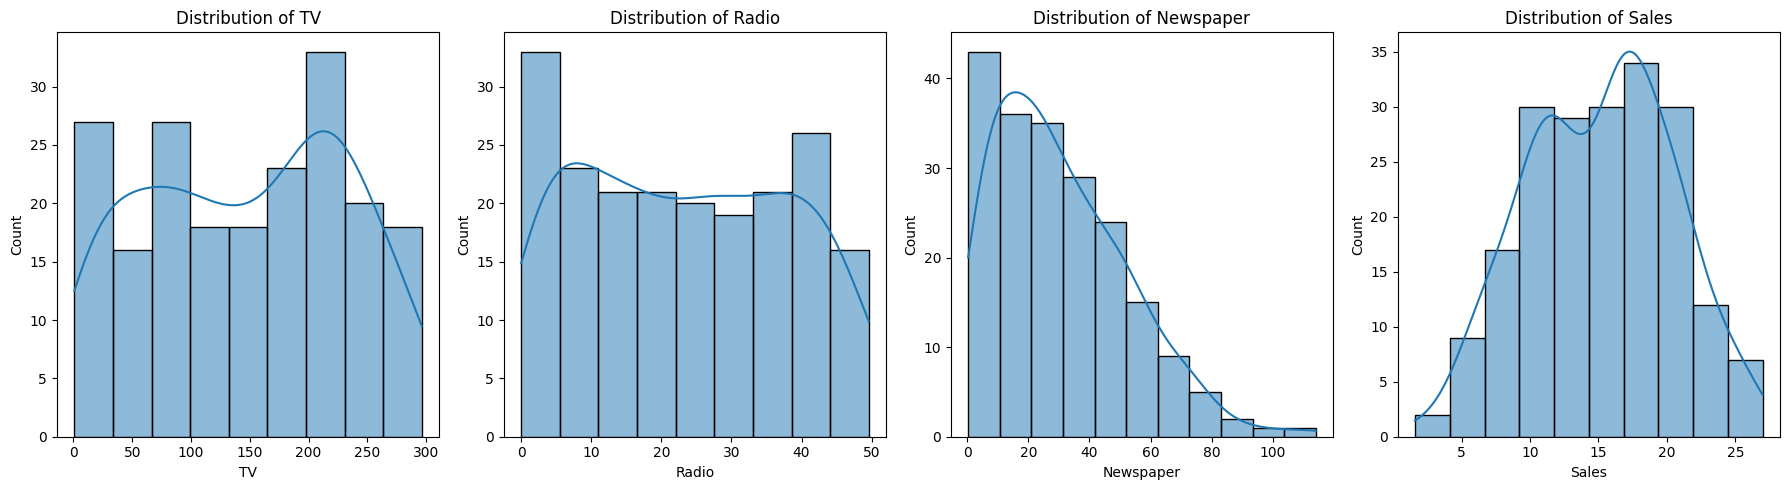

In [194]:
plt.figure(figsize=(18, 5))

# Distribution of TV
plt.subplot(1, 4, 1)
sns.histplot(df['TV'], kde=True)
plt.title('Distribution of TV')

# Distribution of Radio
plt.subplot(1, 4, 2)
sns.histplot(df['Radio'], kde=True)
plt.title('Distribution of Radio')

# Distribution of Newspaper
plt.subplot(1, 4, 3)
sns.histplot(df['Newspaper'], kde=True)
plt.title('Distribution of Newspaper')

# Distribution of Sales
plt.subplot(1, 4, 4)
sns.histplot(df['Sales'], kde=True)
plt.title('Distribution of Sales')

plt.tight_layout()
plt.show()

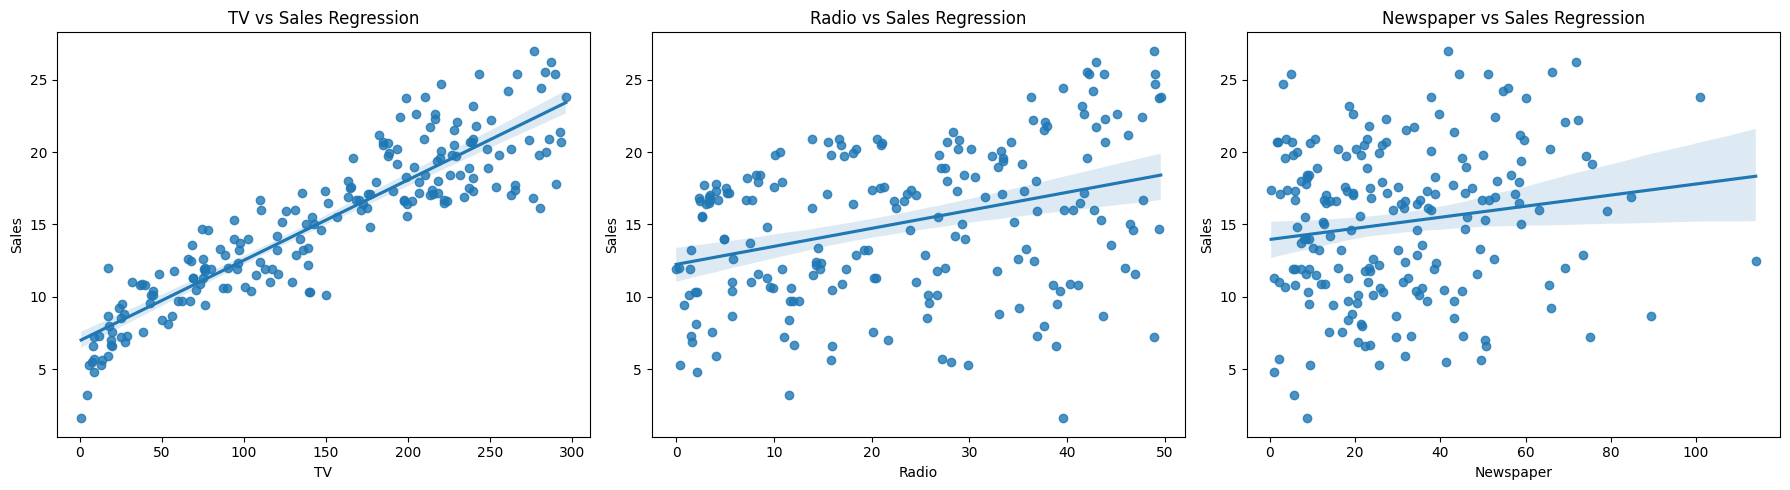

In [191]:
plt.figure(figsize=(18, 5))

# TV vs Sales
plt.subplot(1, 3, 1)
sns.regplot(x=df['TV'], y=df['Sales'])
plt.title('TV vs Sales Regression')

# Radio vs Sales
plt.subplot(1, 3, 2)
sns.regplot(x=df['Radio'], y=df['Sales'])
plt.title('Radio vs Sales Regression')

# Newspaper vs Sales
plt.subplot(1, 3, 3)
sns.regplot(x=df['Newspaper'], y=df['Sales'])
plt.title('Newspaper vs Sales Regression')

plt.tight_layout()
plt.show()

In [136]:
# importing train test model and loading independent variables to x and dependent variables to y
from sklearn.model_selection import train_test_split
x = data[['TV','Radio','Newspaper']]
y = data['Sales']

In [138]:
# assigning variables in train test split where test size is 30%
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [181]:
# importing Regression models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix)

In [142]:
# importing metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [144]:
# Linear Regression algorithm
lr = LinearRegression()
lr.fit(x_train,y_train)
lpred = lr.predict(x_test)
lmae = mean_absolute_error(y_test,lpred)
lmse = mean_squared_error(y_test,lpred)
lr2 = r2_score(y_test,lpred)
print(f'The mean absolute score is: {lmae}\nThe mean squared error is: {lmse}\nThe root mean squared error is: {np.sqrt(lmse)}\nR2 score is: {lr2}')

The mean absolute score is: 1.194741713405674
The mean squared error is: 2.370659971225658
The root mean squared error is: 1.5396947656031237
R2 score is: 0.9071151423684273


In [146]:
# Scalar Vector Machine algorithm
svm = SVR()
svm.fit(x_train,y_train)
spred = svm.predict(x_test)
smae = mean_absolute_error(y_test,spred)
smse = mean_squared_error(y_test,spred)
sr2 = r2_score(y_test,spred)
print(f'The mean absolute score is: {smae}\nThe mean squared error is: {smse}\nThe root mean squared error is: {np.sqrt(smse)}\nR2 score is: {sr2}')

The mean absolute score is: 1.3966918034796305
The mean squared error is: 3.10100153708118
The root mean squared error is: 1.7609660806163132
R2 score is: 0.8784996204503526


In [148]:
# Random Forest algorithm
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rpred = rfr.predict(x_test)
rmae = mean_absolute_error(y_test,rpred)
rmse = mean_squared_error(y_test,rpred)
rr2 = r2_score(y_test,rpred)
print(f'The mean absolute score is: {rmae}\nThe mean squared error is: {rmse}\nThe root mean squared error is: {np.sqrt(rmse)}\nR2 score is: {rr2}')

The mean absolute score is: 0.7610833333333312
The mean squared error is: 0.9293485166666665
The root mean squared error is: 0.96402723855017
R2 score is: 0.9635871842826675


In [150]:
# Decision Tree algorithm
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dpred = dtr.predict(x_test)
dmae = mean_absolute_error(y_test,dpred)
dmse = mean_squared_error(y_test,dpred)
dr2 = r2_score(y_test,dpred)
print(f'The mean absolute score is: {dmae}\nThe mean squared error is: {dmse}\nThe root mean squared error is: {np.sqrt(dmse)}\nR2 score is: {dr2}')

The mean absolute score is: 1.0016666666666665
The mean squared error is: 2.013166666666666
The root mean squared error is: 1.4188610455808088
R2 score is: 0.9211220919526119


Text(0.5, 1.0, 'Plot of Decision Prediction and y_test')

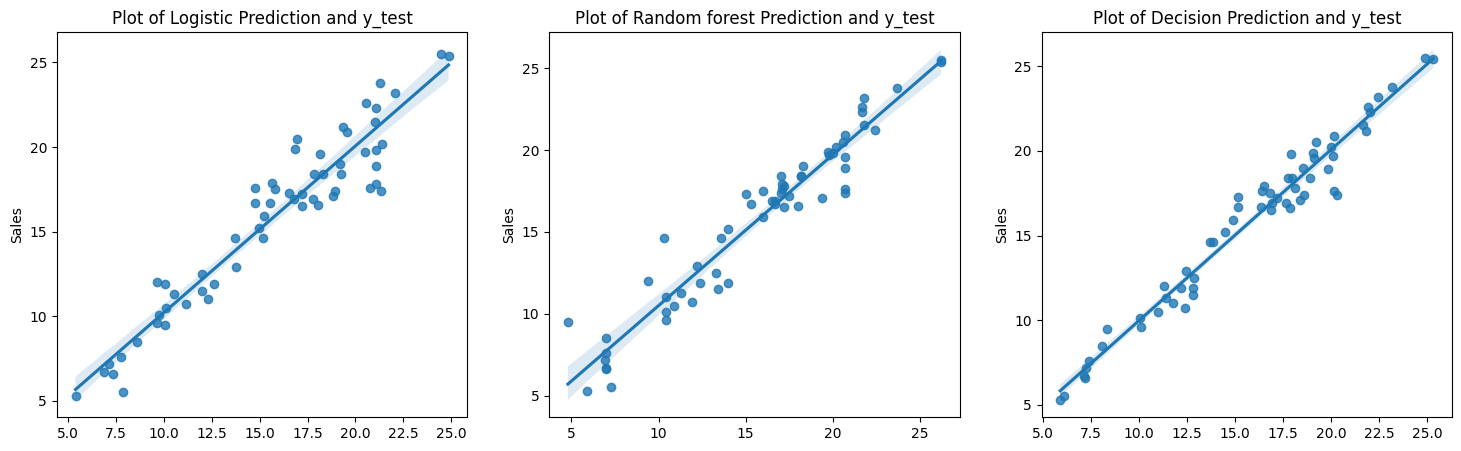

In [275]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.regplot(x=lpred,y=y_test)
plt.title("Plot of Logistic Prediction and y_test")



plt.subplot(1,3,2)
sns.regplot(x=dpred,y=y_test)
plt.title("Plot of Random forest Prediction and y_test")


plt.subplot(1,3,3)
sns.regplot(x=rpred,y=y_test)
plt.title("Plot of Decision Prediction and y_test")
